In [1]:
import numpy as np
import sqlite3
import plotly.express as px
import pandas as pd
import sqlite3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from useful_functions_2 import *
from pdf2image import convert_from_path
from sklearn.manifold import TSNE
from scipy.spatial.distance import braycurtis
from skbio.stats.distance import permanova
from scipy.spatial.distance import pdist
from skbio.stats.distance import DistanceMatrix

In [2]:
tables_to_join = ["tPlantMicrobeGenera", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(39695, 15)

In [3]:
full_df = full_df.T.drop_duplicates().T

In [4]:
full_df.head()

,sample_id,genera,relative_abundance,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,Bacteria|Actinobacteria|Actinobacteria|Coryneb...,0.63776,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL1,Bacteria|Proteobacteria|Alphaproteobacteria|Rh...,0.11405,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
2,RRL1,Bacteria|Proteobacteria|Gammaproteobacteria|Ps...,0.1119,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
3,RRL1,Bacteria|Bacteroidetes|Cytophagia|Cytophagales...,0.09485,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
4,RRL1,Bacteria|Proteobacteria|Alphaproteobacteria|Sp...,0.08559,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842


In [5]:
df = full_df.copy()

In [6]:
subdf = df.copy()

In [7]:
subdf.head()

,sample_id,genera,relative_abundance,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,Bacteria|Actinobacteria|Actinobacteria|Coryneb...,0.63776,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL1,Bacteria|Proteobacteria|Alphaproteobacteria|Rh...,0.11405,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
2,RRL1,Bacteria|Proteobacteria|Gammaproteobacteria|Ps...,0.1119,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
3,RRL1,Bacteria|Bacteroidetes|Cytophagia|Cytophagales...,0.09485,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
4,RRL1,Bacteria|Proteobacteria|Alphaproteobacteria|Sp...,0.08559,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842


In [8]:
origin_pivoted_df = subdf.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='genera', values='relative_abundance')
origin_pivoted_df.shape

# row_sum = origin_pivoted_df.sum(axis=1)

origin_pivoted_df = origin_pivoted_df.reset_index()

genera_col = origin_pivoted_df.columns
genera_col = genera_col.drop(['sample_id','site_id', 'species', 'V2'])

# sub_pivot = origin_pivoted_df[genera_col].astype(float)

# for row in range(sub_pivot.shape[0]):
#     sub_pivot.loc[row] = sub_pivot.loc[row]/row_sum[row]

# new_sum = sub_pivot.sum(axis=1)
# new_sum

# origin_pivoted_df[genera_col] = sub_pivot

# origin_pivoted_df.head()

# row_sum = origin_pivoted_df[genera_col].sum(axis=1)
# print(row_sum)

In [9]:
origin_pivoted_df = origin_pivoted_df.reset_index()
origin_pivoted_df.head()

genera,index,sample_id,site_id,species,V2,Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum,Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halobacteriaceae|Halorussus,Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halococcaceae|Halococcus,Archaea|Euryarchaeota|Halobacteria|Haloferacales|Haloferacaceae|Halobellus,Archaea|Euryarchaeota|Halobacteria|Haloferacales|Haloferacaceae|Haloferax,...,Eukaryota|Basidiomycota|Ustilaginomycetes|Ustilaginales|Ustilaginaceae|Sporisorium,Eukaryota|Basidiomycota|Ustilaginomycetes|Ustilaginales|Ustilaginaceae|Ustilago,Eukaryota|Chlorophyta|Mamiellophyceae|Mamiellales|Bathycoccaceae|Bathycoccus,Eukaryota|Chlorophyta|Mamiellophyceae|Mamiellales|Bathycoccaceae|Ostreococcus,Eukaryota|Chlorophyta|Mamiellophyceae|Mamiellales|Mamiellaceae|Micromonas,Eukaryota|Chlorophyta|Trebouxiophyceae|Chlorellales|Chlorellaceae|Chlorella,Eukaryota|Chlorophyta|Trebouxiophyceae|Chlorellales|Chlorellaceae|Prototheca,Eukaryota|Mucoromycota|Mortierellomycetes|Mortierellales|Mortierellaceae|Mortierella,Eukaryota|Mucoromycota|Mucoromycetes|Mucorales|Mucoraceae|Mucor,Eukaryota|Mucoromycota|Mucoromycetes|Mucorales|Rhizopodaceae|Rhizopus
0,0,CMB10,CMB,syriaca,0.999777,0.03005,NaN,0.016,NaN,NaN,...,NaN,0.00013,NaN,NaN,NaN,NaN,0.00014,0.00011,NaN,NaN
1,1,CMB11,CMB,syriaca,1.000000,0.02488,NaN,0.00903,NaN,NaN,...,NaN,0.00021,0.00011,NaN,0.00011,NaN,0.00016,NaN,NaN,NaN
2,2,CMB13,CMB,syriaca,0.989131,NaN,NaN,NaN,NaN,NaN,...,0.01302,0.00541,0.01347,NaN,0.00792,NaN,NaN,NaN,NaN,NaN
3,3,CMB14,CMB,syriaca,0.999992,0.02786,NaN,0.00968,NaN,NaN,...,0.00013,NaN,NaN,NaN,0.00018,NaN,0.00021,NaN,NaN,NaN
4,4,CMB15,CMB,syriaca,0.998548,0.00774,NaN,0.00315,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
genera_col

Index(['Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum',
       'Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halobacteriaceae|Halorussus',
       'Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Halococcaceae|Halococcus',
       'Archaea|Euryarchaeota|Halobacteria|Haloferacales|Haloferacaceae|Halobellus',
       'Archaea|Euryarchaeota|Halobacteria|Haloferacales|Haloferacaceae|Haloferax',
       'Archaea|Euryarchaeota|Halobacteria|Haloferacales|Haloferacaceae|Halogeometricum',
       'Archaea|Euryarchaeota|Halobacteria|Haloferacales|Halorubraceae|Halolamina',
       'Archaea|Euryarchaeota|Halobacteria|Haloferacales|Halorubraceae|Halorubrum',
       'Archaea|Euryarchaeota|Halobacteria|Natrialbales|Natrialbaceae|Saliphagus',
       'Archaea|Euryarchaeota|Methanobacteria|Methanobacteriales|Methanobacteriaceae|Methanobacterium',
       ...
       'Eukaryota|Basidiomycota|Ustilaginomycetes|Ustilaginales|Ustilaginaceae|Sporisorium',
       'Eukaryota|Ba

In [11]:
origin_pivoted_df[genera_col] = origin_pivoted_df[genera_col].astype(float)
sum_row = origin_pivoted_df[genera_col].sum()


In [12]:
sum_row = origin_pivoted_df[genera_col].sum()

abundant_genera = sum_row.nlargest(100)

select_columns = (abundant_genera.index).tolist()
select_columns.insert(0, 'V2')
select_columns.insert(0, 'sample_id')
select_columns.insert(0, 'site_id')
select_columns.insert(0, 'species')

origin_pivoted_df = origin_pivoted_df[select_columns]

origin_pivoted_df.head()

genera,species,site_id,sample_id,V2,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Sphingomonas,Bacteria|Bacteroidetes|Chitinophagia|Chitinophagales|Chitinophagaceae|Asinibacterium,Bacteria|Actinobacteria|Actinobacteria|Corynebacteriales|Corynebacteriaceae|Corynebacterium,Bacteria|Firmicutes|Clostridia|Clostridiales|Clostridiaceae|Clostridium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Bradyrhizobium,...,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales|Burkholderiaceae|Cupriavidus,Bacteria|Actinobacteria|Actinobacteria|Micromonosporales|Micromonosporaceae|Micromonospora,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Nitrobacter,Bacteria|Actinobacteria|Actinobacteria|Geodermatophilales|Geodermatophilaceae|Geodermatophilus,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales|Burkholderiaceae|Pandoraea,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Starkeya,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Pseudolabrys,Bacteria|Actinobacteria|Actinobacteria|Micrococcales|Micrococcaceae|Paenarthrobacter,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Rhodopseudomonas,Eukaryota|Basidiomycota|Tremellomycetes|Tremellales|Cryptococcaceae|Cryptococcus
0,syriaca,CMB,CMB10,0.999777,0.71969,4.65386,0.41737,0.00752,0.85953,0.62364,...,0.01194,0.01458,0.01866,0.00380,0.01730,0.00671,0.00629,0.00345,0.00822,0.02611
1,syriaca,CMB,CMB11,1.000000,2.64833,1.26191,0.35352,0.01694,0.01393,0.38655,...,0.00929,0.00306,0.00400,NaN,NaN,0.00851,0.00081,0.00461,0.00072,0.01316
2,syriaca,CMB,CMB13,0.989131,29.24931,22.26913,NaN,NaN,NaN,0.29934,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29095
3,syriaca,CMB,CMB14,0.999992,0.82043,0.83340,0.07512,0.00533,0.01104,0.07820,...,0.00060,NaN,NaN,0.00033,NaN,NaN,NaN,0.00395,NaN,0.01120
4,syriaca,CMB,CMB15,0.998548,13.04768,1.69613,0.06380,0.00593,0.17548,0.05448,...,0.03425,0.00535,0.00023,0.00248,0.04383,NaN,0.00213,0.00058,0.00149,0.00348


In [13]:
opdf = origin_pivoted_df.copy()
opdf = opdf.fillna(0)
microbe_cols = opdf.columns.drop(['species', 'site_id', 'sample_id', 'V2'])
#microbe_cols = abundant_genera.index

In [14]:
# opdf[microbe_cols] = StandardScaler().fit_transform(opdf[microbe_cols])  

In [15]:
opdf.head()

genera,species,site_id,sample_id,V2,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Sphingomonas,Bacteria|Bacteroidetes|Chitinophagia|Chitinophagales|Chitinophagaceae|Asinibacterium,Bacteria|Actinobacteria|Actinobacteria|Corynebacteriales|Corynebacteriaceae|Corynebacterium,Bacteria|Firmicutes|Clostridia|Clostridiales|Clostridiaceae|Clostridium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Bradyrhizobium,...,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales|Burkholderiaceae|Cupriavidus,Bacteria|Actinobacteria|Actinobacteria|Micromonosporales|Micromonosporaceae|Micromonospora,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Nitrobacter,Bacteria|Actinobacteria|Actinobacteria|Geodermatophilales|Geodermatophilaceae|Geodermatophilus,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales|Burkholderiaceae|Pandoraea,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Starkeya,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Pseudolabrys,Bacteria|Actinobacteria|Actinobacteria|Micrococcales|Micrococcaceae|Paenarthrobacter,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Rhodopseudomonas,Eukaryota|Basidiomycota|Tremellomycetes|Tremellales|Cryptococcaceae|Cryptococcus
0,syriaca,CMB,CMB10,0.999777,0.71969,4.65386,0.41737,0.00752,0.85953,0.62364,...,0.01194,0.01458,0.01866,0.00380,0.01730,0.00671,0.00629,0.00345,0.00822,0.02611
1,syriaca,CMB,CMB11,1.000000,2.64833,1.26191,0.35352,0.01694,0.01393,0.38655,...,0.00929,0.00306,0.00400,0.00000,0.00000,0.00851,0.00081,0.00461,0.00072,0.01316
2,syriaca,CMB,CMB13,0.989131,29.24931,22.26913,0.00000,0.00000,0.00000,0.29934,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.29095
3,syriaca,CMB,CMB14,0.999992,0.82043,0.83340,0.07512,0.00533,0.01104,0.07820,...,0.00060,0.00000,0.00000,0.00033,0.00000,0.00000,0.00000,0.00395,0.00000,0.01120
4,syriaca,CMB,CMB15,0.998548,13.04768,1.69613,0.06380,0.00593,0.17548,0.05448,...,0.03425,0.00535,0.00023,0.00248,0.04383,0.00000,0.00213,0.00058,0.00149,0.00348


In [16]:
opdf = opdf[opdf["species"].isin(['syriaca','exaltata'])]
opdf.shape

(144, 104)

In [17]:
df = opdf

In [18]:
site_list = df['site_id']

df['BGR'] = site_list

df['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
df = df[df["BGR"].isin([0,1,2,3])]

df['BGR'] = df['BGR'].replace([0], 'Wintergreen')
df['BGR'] = df['BGR'].replace([1], 'Cole Mountain')
df['BGR'] = df['BGR'].replace([2], 'Blacksburg')
df['BGR'] = df['BGR'].replace([3], 'HR')

In [19]:
# df = df[df["site_id"].isin(['SGC', 'LFS', 'RF', 'RGT', 'LM', 'PTW', 'MKP', 'HR'])]
# df.shape

In [20]:
site_list = df['site_id']

df['run_id'] = site_list

df['run_id'].replace({'RRL': 1, 'FRW': 1, 'MMP': 1, 'PNR': 1, 'CMB': 1, 'SLG': 1,
                    'SGC': 2, 'LFS': 2, 'RF': 2, 'RGT': 2, 'LM': 2, 'PTW': 2, 'MKP': 2,'HR': 2, 'GH': 2}, inplace=True) #

df = df[df["run_id"].isin([1, 2])]
df.shape

(144, 106)

In [21]:
df.head()

genera,species,site_id,sample_id,V2,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Sphingomonas,Bacteria|Bacteroidetes|Chitinophagia|Chitinophagales|Chitinophagaceae|Asinibacterium,Bacteria|Actinobacteria|Actinobacteria|Corynebacteriales|Corynebacteriaceae|Corynebacterium,Bacteria|Firmicutes|Clostridia|Clostridiales|Clostridiaceae|Clostridium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Bradyrhizobium,...,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Nitrobacter,Bacteria|Actinobacteria|Actinobacteria|Geodermatophilales|Geodermatophilaceae|Geodermatophilus,Bacteria|Proteobacteria|Betaproteobacteria|Burkholderiales|Burkholderiaceae|Pandoraea,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Starkeya,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Xanthobacteraceae|Pseudolabrys,Bacteria|Actinobacteria|Actinobacteria|Micrococcales|Micrococcaceae|Paenarthrobacter,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Bradyrhizobiaceae|Rhodopseudomonas,Eukaryota|Basidiomycota|Tremellomycetes|Tremellales|Cryptococcaceae|Cryptococcus,BGR,run_id
0,syriaca,CMB,CMB10,0.999777,0.71969,4.65386,0.41737,0.00752,0.85953,0.62364,...,0.01866,0.00380,0.01730,0.00671,0.00629,0.00345,0.00822,0.02611,Cole Mountain,1
1,syriaca,CMB,CMB11,1.000000,2.64833,1.26191,0.35352,0.01694,0.01393,0.38655,...,0.00400,0.00000,0.00000,0.00851,0.00081,0.00461,0.00072,0.01316,Cole Mountain,1
2,syriaca,CMB,CMB13,0.989131,29.24931,22.26913,0.00000,0.00000,0.00000,0.29934,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.29095,Cole Mountain,1
3,syriaca,CMB,CMB14,0.999992,0.82043,0.83340,0.07512,0.00533,0.01104,0.07820,...,0.00000,0.00033,0.00000,0.00000,0.00000,0.00395,0.00000,0.01120,Cole Mountain,1
4,syriaca,CMB,CMB15,0.998548,13.04768,1.69613,0.06380,0.00593,0.17548,0.05448,...,0.00023,0.00248,0.04383,0.00000,0.00213,0.00058,0.00149,0.00348,Cole Mountain,1


In [22]:
df.shape

(144, 106)

In [23]:
site_list = ['RRL', 'FRW', 'MMP', 'PNR', 'CMB', 'SLG', 'RF', 'LFS', 'PTW', 'LM', 'MKP', 'RGT']

# Predefined set of colors
unique_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'pink', 'brown', 'gray', 'olive', 'lime', 'teal']

# Create a dictionary with list elements as keys and corresponding colors as values
site_color_dict = dict(zip(site_list, unique_colors))

print(site_color_dict)

{'RRL': 'red', 'FRW': 'green', 'MMP': 'blue', 'PNR': 'orange', 'CMB': 'purple', 'SLG': 'cyan', 'RF': 'pink', 'LFS': 'brown', 'PTW': 'gray', 'LM': 'olive', 'MKP': 'lime', 'RGT': 'teal'}


In [24]:
df.shape

(144, 106)

In [25]:
X = df[microbe_cols]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [26]:
pc1 = []
pc2 = []
for i in principal_components:
    pc1.append(i[0])
    pc2.append(i[1])
    
pc1_q3, pc1_q1 = np.percentile(pc1, [75 ,25])
iqr1 = pc1_q3 - pc1_q1
pc2_q3, pc2_q1 = np.percentile(pc2, [75 ,25])
iqr2 = pc2_q3 - pc2_q1

In [27]:
# drop_indexs = []
# for i in enumerate(principal_components):
#     if i[1][0] > pc1_q3 + iqr1:
#         drop_indexs.append(i[0])
#         print(i)
#     if i[1][1] > pc2_q3 + iqr2:
#         print(i)
#         drop_indexs.append(i[0])

In [28]:
# df = df.drop(index=drop_indexs)
# df.head()

In [29]:
df.shape

(144, 106)

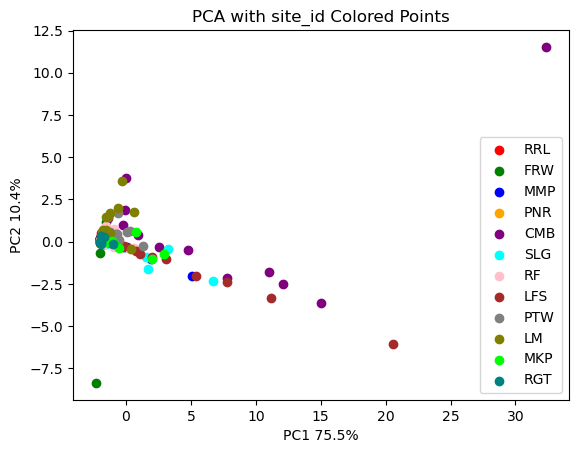

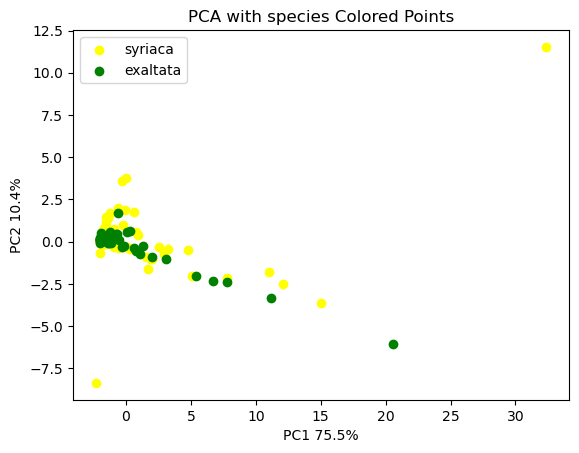

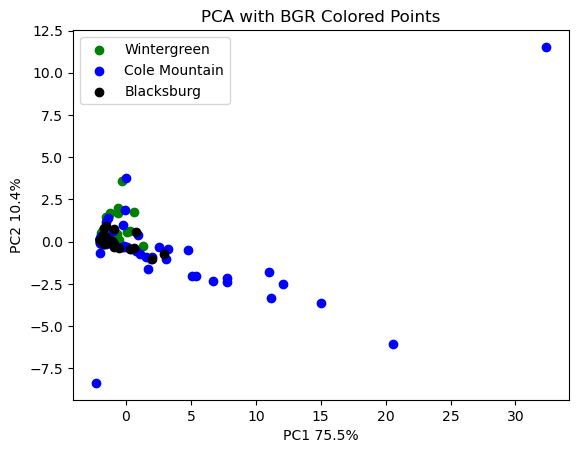

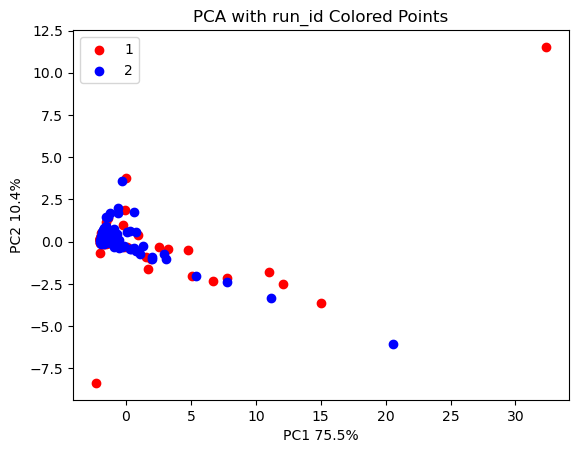

In [30]:
X = df[microbe_cols]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)



for graph_type in ['site_id', 'species', 'BGR', 'run_id']:
    if graph_type == 'site_id':
        colors = site_color_dict
    elif graph_type == 'species':
        colors = {'syriaca': 'yellow', 'exaltata': 'green'}
    elif graph_type == 'BGR':
        colors = {'Wintergreen': 'green', 'Cole Mountain': 'blue', 'Blacksburg': 'black'}
    else:
        colors = {1: 'red', 2: 'blue'}
    
    fig, ax = plt.subplots()

    for key, color in colors.items():
        mask = (df[graph_type] == key)
        ax.scatter(
            principal_components[mask, 0],
            principal_components[mask, 1],
            c=color,
            label= key
        )
    
    ax.set_xlabel("PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%')
    ax.set_ylabel("PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
    ax.set_title('PCA with ' + graph_type + ' Colored Points')
    ax.legend()
    plt.show()
    if graph_type == 'site_id':
        ax.set_title('PCA of Field Sites and Leaf Microbiome')
        fig1 = fig
    elif graph_type == 'species':
        ax.set_title('PCA of Plant Species and Leaf Microbiome')
        fig2 = fig
    elif graph_type == 'BGR':
        ax.set_title('PCA of Broad Geographic Region and Leaf Microbiome')
        fig3 = fig
    else:
        ax.set_title('PCA of Run Id and Leaf Microbiome')
        fig3 = fig

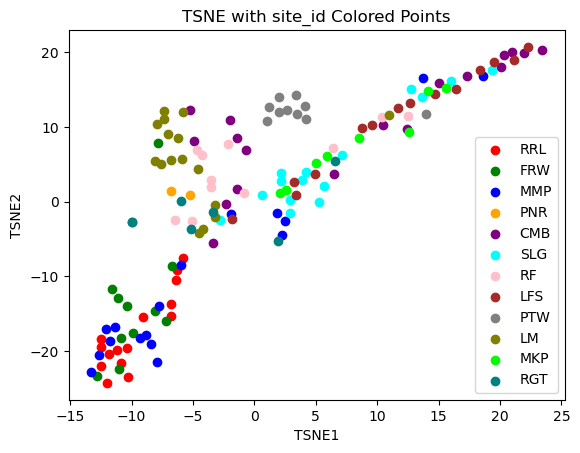

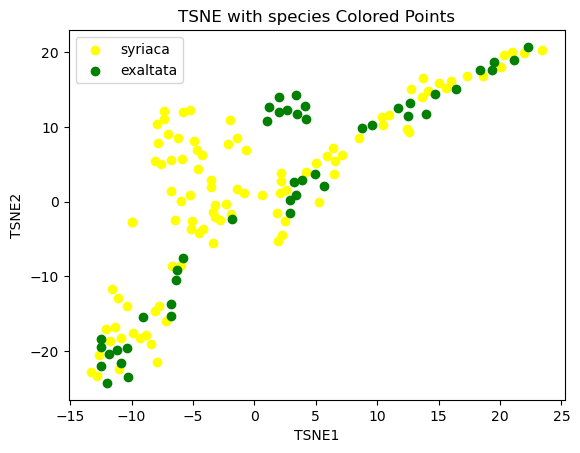

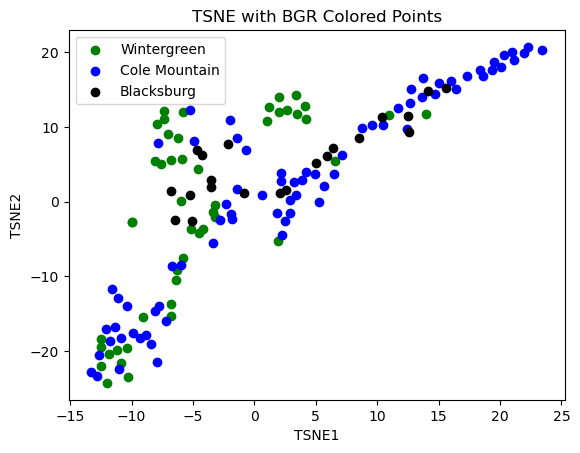

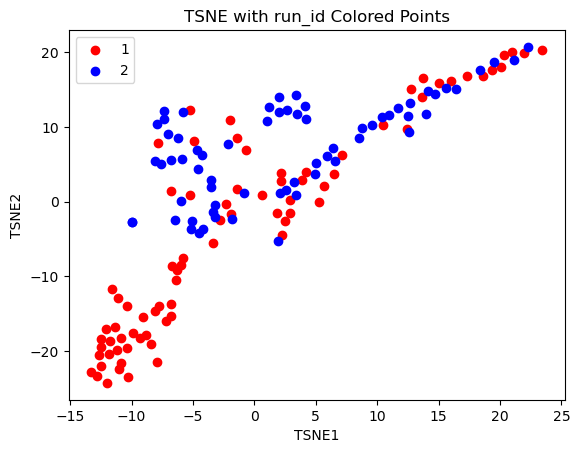

In [34]:
perplexity_value = 15 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(df[microbe_cols])


for graph_type in ['site_id', 'species', 'BGR', 'run_id']:
    if graph_type == 'site_id':
        colors = site_color_dict
    elif graph_type == 'species':
        colors = {'syriaca': 'yellow', 'exaltata': 'green'}
    elif graph_type == 'BGR':
        colors = {'Wintergreen': 'green', 'Cole Mountain': 'blue', 'Blacksburg': 'black'}
    else:
        colors = {1: 'red', 2: 'blue'}
    fig, ax = plt.subplots()

    for key, color in colors.items():
        mask = (df[graph_type] == key)
        ax.scatter(
            tsne_transformed[mask, 0],
            tsne_transformed[mask, 1],
            c=color,
            label= key
        )
    
    ax.set_xlabel("TSNE1")
    ax.set_ylabel("TSNE2")
    ax.set_title('TSNE with ' + graph_type + ' Colored Points')
    ax.legend()
    plt.show()

    if graph_type == 'site_id':
        ax.set_title('TSNE of Field Site and Leaf Microbiome, P.V. = ' + str(perplexity_value))
        fig4 = fig
    elif graph_type == 'species':
        ax.set_title('TSNE of Species and Leaf Microbiome, P.V. = ' + str(perplexity_value))
        fig5 = fig
    elif graph_type == 'BGR':
        ax.set_title('TSNE of Broad Geographic Region and Leaf Microbiome')
        fig3 = fig
    else:
        ax.set_title('TSNE of Run Id and Leaf Microbiome')
        fig3 = fig

In [32]:
dis_matrix = pdist(df[microbe_cols], 'braycurtis')
from skbio.stats.distance import DistanceMatrix
fin_matrix = DistanceMatrix(dis_matrix)
permanova_site = permanova(fin_matrix, grouping = df['site_id'], permutations = 9*154)
permanova_bgr = permanova(fin_matrix, grouping = df['BGR'], permutations = 9*154)
permanova_species = permanova(fin_matrix, grouping = df['species'], permutations = 9*154)


print(permanova_site)
print('')
print(permanova_bgr)
print('')
print(permanova_species)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     144
number of groups                 12
test statistic             7.495022
p-value                    0.000721
number of permutations         1386
Name: PERMANOVA results, dtype: object

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     144
number of groups                  3
test statistic             5.427633
p-value                    0.000721
number of permutations         1386
Name: PERMANOVA results, dtype: object

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     144
number of groups                  2
test statistic             2.866587
p-value                    0.007931
number of permutations         1386
Name: PERMANOVA results, dtype: object


In [33]:
### Save Figures and Create Final Figure
fig1.savefig('leaf_microbe_site_id.pdf', dpi=300, bbox_inches='tight')
fig2.savefig('leaf_microbe_species.pdf', dpi=300, bbox_inches='tight')
fig3.savefig('leaf_microbe_bgr.pdf', dpi=300, bbox_inches='tight')
fig4.savefig('leaf_microbe_site_id_tsne.pdf', dpi=300, bbox_inches='tight')
fig5.savefig('leaf_microbe_species_tsne.pdf', dpi=300, bbox_inches='tight')
fig6.savefig('leaf_microbe_bgr_tsne.pdf', dpi=300, bbox_inches='tight')

img1=convert_from_path('leaf_microbe_site_id.pdf')
img2=convert_from_path('leaf_microbe_bgr.pdf')
img3=convert_from_path('leaf_microbe_species.pdf')
img4=convert_from_path('leaf_microbe_site_id_tsne.pdf')
img5=convert_from_path('leaf_microbe_bgr_tsne.pdf')
img6=convert_from_path('leaf_microbe_species_tsne.pdf')



fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))

ax[0][0].imshow(img1[0])
ax[0][1].imshow(img4[0])
ax[1][0].imshow(img2[0])
ax[1][1].imshow(img5[0])
ax[2][0].imshow(img3[0])
ax[2][1].imshow(img6[0])

# plot 2 subplots
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')
ax[2][0].axis('off')
ax[2][1].axis('off')

ax[0][0].annotate("A", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1][0].annotate("C", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[0][1].annotate("B", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1][1].annotate("D", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2][0].annotate("E", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2][1].annotate("F", xy=(-0.05, 0.9), xycoords="axes fraction")


fig.suptitle('Leaf Microbes can be grouped by Plant Host Species')
plt.tight_layout()
plt.show()

fig.savefig('combined_leaf_microbes.pdf', bbox_inches='tight', dpi = 1000)

NameError: name 'fig6' is not defined

### Using Top 50 most Abundant Genera, Syriaca and Exaltata were found to have statistically different microbial leaf communities

In [ ]:
bardf = origin_pivoted_df.drop(['site_id', 'species', 'V2'], axis=1)
bardf.head()

In [ ]:
bardf.shape

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cumval=0
fig = plt.figure(figsize=(12,8))
for col in bardf.columns[~bardf.columns.isin(['sample_id'])]:
    plt.bar(bardf.sample_id, bardf[col], bottom=cumval, label = col)
    cumval = cumval+bardf[col]
    print(col)

_ = plt.xticks(rotation=30)
_ = plt.legend(fontsize=18)

leg = plt.legend(loc='upper center', bbox_to_anchor=(1.3, 1.05))